In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [2]:
train= pd.read_excel('final dataset.xlsx')
val= pd.read_excel('Test data.xlsx')
test= pd.read_excel('Test data.xlsx')
train.head()

,id,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,...,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status
0,9,288.88,72.22,15 days,25.0,Visa,NaN,NaN,803,1991-06-25,...,4,5,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
1,11,100.00,25.00,15 days,25.0,Visa,NaN,NaN,803,1991-06-25,...,5,6,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
2,13,100.00,25.00,15 days,25.0,Visa,NaN,NaN,803,1991-06-25,...,6,7,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
3,29,1000.00,250.00,30 days,25.0,Visa,72021.0,Access Bank,803,1989-03-14,...,3,5,1,1,1,2020-06-14 13:42:10,2020-06-14 13:42:10,1,1,SETTLED
4,37,1000.00,250.00,15 days,25.0,Mastercard,102021.0,United Bank for Africa,703,1991-01-31,...,1,7,1,1,1,2020-06-13 11:29:13,2020-06-13 11:29:13,1,1,SETTLED


In [3]:
val.head()

,id,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,...,passed_requests,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans
0,20816,25000,8872.50,21 days,35.49,Mastercard,92022.0,Polaris Bank,816,1991-07-08,...,2,6,17,1,1,1,2020-09-04 13:53:02,2020-09-04 13:53:02,1,1
1,20158,3600,719.64,7 days,19.99,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,...,49,357,133,1,1,5,2020-05-27 19:19:18,2020-09-24 21:39:02,3,30
2,19272,3600,719.64,7 days,19.99,Mastercard,122022.0,Fidelity Bank,703,1996-02-16,...,3,7,64,1,1,1,2020-12-22 16:52:00,2020-12-22 16:52:00,1,1
3,19210,3600,719.64,7 days,19.99,Mastercard,82022.0,Guaranty Trust Bank,903,2000-09-20,...,2,4,15,1,1,2,2020-10-31 05:48:52,2021-01-02 22:33:07,1,2
4,19134,3600,719.64,7 days,19.99,Mastercard,112023.0,Guaranty Trust Bank,703,1984-05-02,...,1,2,1,1,1,2,2021-01-05 09:44:41,2021-01-05 16:00:06,1,2


In [4]:
train.status.value_counts()

SETTLED     1511
PAST DUE     989
Name: status, dtype: int64

In [5]:
val.shape

(1170, 39)

In [6]:
train.shape

(2500, 40)

# Visualizing The Target Value


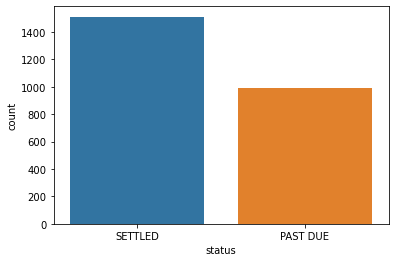

In [7]:
import seaborn as sns
sns.countplot(x= train['status'])

# Filling Missing Values

In [8]:
train.dtypes

id                                 int64
loan_amount                      float64
interest_due                     float64
tenor                             object
interest_rate                    float64
card_network                      object
card_expiry                      float64
bank                              object
phone_network                      int64
date_of_birth             datetime64[ns]
tier                              object
selfie_id_check                   object
gender                            object
marital_status                    object
no_of_dependent                   object
type_of_residence                 object
educational_attainment            object
employment_status                 object
sector_of_employment              object
monthly_net_income                object
work_start_date           datetime64[ns]
work_email_validated               int64
address                           object
requested_amount                 float64
purpose         

In [9]:
train.isnull().sum()

id                           0
loan_amount                  0
interest_due                 0
tenor                        0
interest_rate               23
card_network                 0
card_expiry                 69
bank                        69
phone_network                0
date_of_birth                0
tier                         0
selfie_id_check              0
gender                    1940
marital_status               0
no_of_dependent              0
type_of_residence         1940
educational_attainment       0
employment_status            0
sector_of_employment         0
monthly_net_income           0
work_start_date              1
work_email_validated         0
address                   1940
requested_amount             0
purpose                      0
proposed_payday              0
credit_score                 0
location                     0
failed_requests              0
passed_requests              0
all_requests                 0
logins                       0
phone_nu

In [10]:
val.isnull().sum()

id                          0
loan_amount                 0
interest_due                0
tenor                       0
interest_rate               0
card_network                0
card_expiry                23
bank                       23
phone_network               0
date_of_birth               0
tier                        0
selfie_id_check             0
gender                    837
marital_status              0
no_of_dependent             0
type_of_residence         837
educational_attainment      0
employment_status           0
sector_of_employment        0
monthly_net_income          0
work_start_date             0
work_email_validated        0
address                   837
requested_amount            0
purpose                     0
proposed_payday             0
credit_score                0
location                    0
failed_requests             0
passed_requests             0
all_requests                0
logins                      0
phone_numbers               0
emails    

In [11]:
train.gender.value_counts(dropna=False)

NaN       1940
Male       409
Female     151
Name: gender, dtype: int64

In [12]:
train[~train.gender.isna()].status.value_counts()

PAST DUE    308
SETTLED     252
Name: status, dtype: int64

In [13]:
train.drop(['id','gender', 'type_of_residence', 'address'], 1, inplace=True)
train.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate', 'card_network',
       'card_expiry', 'bank', 'phone_network', 'date_of_birth', 'tier',
       'selfie_id_check', 'marital_status', 'no_of_dependent',
       'educational_attainment', 'employment_status', 'sector_of_employment',
       'monthly_net_income', 'work_start_date', 'work_email_validated',
       'requested_amount', 'purpose', 'proposed_payday', 'credit_score',
       'location', 'failed_requests', 'passed_requests', 'all_requests',
       'logins', 'phone_numbers', 'emails', 'lenders', 'first_account',
       'last_account', 'lending_lenders', 'loans', 'status'],
      dtype='object')

In [14]:
val.drop(['id','gender', 'type_of_residence', 'address'], 1, inplace=True)
val.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate', 'card_network',
       'card_expiry', 'bank', 'phone_network', 'date_of_birth', 'tier',
       'selfie_id_check', 'marital_status', 'no_of_dependent',
       'educational_attainment', 'employment_status', 'sector_of_employment',
       'monthly_net_income', 'work_start_date', 'work_email_validated',
       'requested_amount', 'purpose', 'proposed_payday', 'credit_score',
       'location', 'failed_requests', 'passed_requests', 'all_requests',
       'logins', 'phone_numbers', 'emails', 'lenders', 'first_account',
       'last_account', 'lending_lenders', 'loans'],
      dtype='object')

In [15]:
train.interest_rate.value_counts()

25.20    279
35.49    109
15.00    104
19.99     56
11.33     47
        ... 
7.94       1
15.59      1
7.90       1
17.12      1
17.35      1
Name: interest_rate, Length: 371, dtype: int64

In [16]:
train.loc[train.interest_rate.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,...,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status
28,3000.0,750.0,21 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,...,3,8,1,1,4,2020-06-11 00:47:19,2020-08-30 23:28:38,3,10,SETTLED
29,3000.0,810.0,14 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,...,171,57,1,1,5,2020-05-27 19:19:18,2020-09-24 21:39:02,3,30,SETTLED
31,2500.0,125.0,1 days,NaN,Mastercard,22023.0,Guaranty Trust Bank,816,1993-10-12,Tier 1,...,10,9,2,2,6,2020-05-17 20:38:35,2021-01-12 11:12:32,3,6,SETTLED
32,2500.0,125.0,1 days,NaN,Mastercard,72022.0,Guaranty Trust Bank,706,1995-09-20,Tier 1,...,11,3,1,2,4,2020-06-05 09:08:59,2020-08-07 20:13:17,2,3,SETTLED
33,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,...,5,11,1,1,4,2020-06-11 00:47:19,2020-08-30 23:28:38,3,10,SETTLED
34,2500.0,125.0,1 days,NaN,Mastercard,72022.0,Guaranty Trust Bank,706,1995-09-20,Tier 1,...,23,4,1,2,4,2020-06-05 09:08:59,2020-08-07 20:13:17,2,3,SETTLED
35,2500.0,125.0,1 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,...,189,62,1,1,5,2020-05-27 19:19:18,2020-09-24 21:39:02,3,30,SETTLED
36,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,...,8,13,1,1,4,2020-06-11 00:47:19,2020-08-30 23:28:38,3,10,SETTLED
40,2500.0,675.0,14 days,NaN,Mastercard,12023.0,Guaranty Trust Bank,806,1988-07-15,Tier 1,...,2,1,1,1,1,2020-06-09 13:47:15,2020-06-09 13:47:15,1,2,SETTLED
41,2500.0,125.0,1 days,NaN,Mastercard,12023.0,Guaranty Trust Bank,806,1988-07-15,Tier 1,...,4,2,1,1,1,2020-06-09 13:47:15,2020-06-09 13:47:15,1,2,SETTLED


Every single one of them is ```settled```



The formula for interest due is:

***
$InterestDue = \frac{InterestRate * LoanAmount}{100}$
***
We could make `interest_rate` the subject of the formula:

*** 
$InterestRate = \frac{InterestDue * 100}{LoanAmount}$

In [17]:
train.loc[train.interest_rate.isna(), 'interest_rate'] = (train.interest_due * 100) / train.loan_amount

train.loc[train.interest_rate.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,...,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status


# Card Expiry Column

In [18]:
train.card_expiry.value_counts()

22023.0     152
32023.0     139
82023.0     130
92023.0     125
72023.0     112
12023.0      92
122022.0     89
102023.0     85
92022.0      83
22022.0      82
82022.0      77
102022.0     75
12022.0      70
72022.0      67
62022.0      66
112022.0     65
122021.0     63
52023.0      60
42022.0      59
62023.0      59
32022.0      55
82021.0      51
52022.0      48
112021.0     48
112023.0     45
102021.0     41
92021.0      40
52021.0      33
72021.0      32
122023.0     29
42021.0      27
62021.0      26
42023.0      26
82024.0      23
102024.0     20
52024.0      19
32021.0      17
22024.0      14
72024.0      13
92024.0      13
12021.0      12
62024.0      11
12024.0      10
32024.0      10
42024.0       8
102020.0      3
22021.0       3
112024.0      2
122024.0      1
112020.0      1
Name: card_expiry, dtype: int64

In [19]:
train[train.card_expiry.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,...,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status
0,288.88,72.22,15 days,25.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,...,4,5,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
1,100.00,25.00,15 days,25.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,...,5,6,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
2,100.00,25.00,15 days,25.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,...,6,7,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
6,1234.56,308.64,15 days,25.00,Visa,NaN,NaN,703,1978-01-06,Tier 1,...,2,0,1,1,5,2020-05-22 12:35:11,2020-10-01 12:54:21,4,23,SETTLED
7,3000.00,750.00,15 days,25.00,Visa,NaN,NaN,706,1994-04-21,Tier 1,...,4,4,1,2,3,2020-06-11 16:34:44,2020-07-30 17:38:23,1,2,SETTLED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,3750.00,1000.00,30 days,11.33,Visa,NaN,NaN,814,1996-05-27,Tier 1,...,43,11,1,1,2,2020-10-31 14:17:15,2020-11-02 22:57:07,1,2,SETTLED
2324,5000.00,1000.00,4 weeks,16.48,Visa,NaN,NaN,703,1983-11-15,Tier 2,...,4,0,1,1,4,2020-11-01 14:48:38,2021-01-07 08:01:07,1,3,SETTLED
2374,5000.00,1000.00,30 days,16.59,Visa,NaN,NaN,907,1990-03-03,Tier 3,...,11,23,1,1,1,2020-10-09 19:53:55,2020-10-09 19:53:55,1,3,SETTLED
2379,3600.00,907.20,14 days,25.20,Visa,NaN,NaN,706,1985-09-04,Tier 1,...,10,80,2,1,3,2020-09-20 23:28:28,2020-10-13 15:28:34,2,4,SETTLED


- `card_expiry` and `bank` seems to have missing values in the same places. 
- Where there's a missing bank, there's a missing card expiry date. 
- All the cards are VISA cards. 
- Most of them are SETTLED, and most of them are located in Lagos.

In [20]:
train[train.card_network == 'Visa']['bank'].value_counts()

Access Bank                 249
United Bank for Africa       39
Access Bank (Diamond)        27
Polaris Bank                 14
Fidelity Bank                 7
Ecobank Nigeria               5
First Bank of Nigeria         5
First City Monument Bank      3
Zenith Bank                   1
Name: bank, dtype: int64

In [21]:
val[val.card_network == 'Visa']['bank'].value_counts()

Access Bank               125
United Bank for Africa     24
Access Bank (Diamond)      10
Polaris Bank                4
First Bank of Nigeria       3
Ecobank Nigeria             2
Name: bank, dtype: int64

In [22]:
train.bank.value_counts()

Guaranty Trust Bank         653
Access Bank                 368
First Bank of Nigeria       306
Zenith Bank                 287
United Bank for Africa      260
Union Bank of Nigeria        83
Ecobank Nigeria              69
First City Monument Bank     67
Sterling Bank                65
Fidelity Bank                59
Stanbic IBTC Bank            59
Polaris Bank                 52
Access Bank (Diamond)        27
Keystone Bank                26
Wema Bank                    26
Unity Bank                   14
Jaiz Bank                     4
Heritage Bank                 3
SunTrust Bank                 2
Providus Bank                 1
Name: bank, dtype: int64

`Access bank` is the one with the highest number of VISA cards. We could fill the missing `bank` values with `Access Bank`.

In [23]:
train.loc[train.bank.isna(), 'bank'] = 'Access Bank'

#df[df.card_expiry.isna()]

In [24]:
val.loc[val.bank.isna(), 'bank'] = 'Access Bank'

# Cleaning Card Expiry Column

In [25]:
train[train.bank == 'Access Bank'].card_expiry.value_counts()

32023.0     55
22023.0     42
82023.0     38
12023.0     31
122022.0    21
52023.0     16
72023.0     14
102022.0    14
92022.0     13
122021.0    12
102023.0    11
112021.0    11
62023.0      9
92023.0      9
22022.0      9
82022.0      7
32021.0      6
12022.0      5
72021.0      5
112022.0     5
112023.0     4
42022.0      4
102021.0     4
72022.0      3
32022.0      3
62022.0      3
42021.0      3
52021.0      2
42023.0      2
62021.0      2
82021.0      2
92021.0      2
52022.0      1
Name: card_expiry, dtype: int64

In [26]:
val[val.bank == 'Access Bank'].card_expiry.value_counts()

52023.0     16
32023.0     14
82023.0     14
12023.0     13
102022.0    11
92023.0     10
72023.0     10
122022.0    10
112023.0     8
62023.0      7
82022.0      7
22023.0      7
92022.0      7
12022.0      7
102023.0     6
112022.0     6
62022.0      5
42022.0      5
112021.0     4
122021.0     4
32022.0      4
22022.0      4
102021.0     3
72022.0      3
42021.0      3
62021.0      2
82021.0      2
52022.0      2
72021.0      1
Name: card_expiry, dtype: int64

In [27]:
train.loc[train.card_expiry.isna(), 'card_expiry'] = 32023.0

In [28]:
val.loc[val.card_expiry.isna(), 'card_expiry'] = 32023.0

We could extract out the year and month of the card_expiry.

In [29]:
train['card_expiry_month'] = train.card_expiry.map(lambda x: str(int(x))[:-4]).astype(int)
train['card_expiry_year'] = train.card_expiry.map(lambda x: str(int(x))[-4:]).astype(int)
train.drop('card_expiry', 1, inplace=True)

train.head()

,loan_amount,interest_due,tenor,interest_rate,card_network,bank,phone_network,date_of_birth,tier,selfie_id_check,...,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status,card_expiry_month,card_expiry_year
0,288.88,72.22,15 days,25.0,Visa,Access Bank,803,1991-06-25,Tier 1,Successful,...,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED,3,2023
1,100.00,25.00,15 days,25.0,Visa,Access Bank,803,1991-06-25,Tier 1,Successful,...,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED,3,2023
2,100.00,25.00,15 days,25.0,Visa,Access Bank,803,1991-06-25,Tier 1,Successful,...,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED,3,2023
3,1000.00,250.00,30 days,25.0,Visa,Access Bank,803,1989-03-14,Tier 1,Pending,...,1,1,1,2020-06-14 13:42:10,2020-06-14 13:42:10,1,1,SETTLED,7,2021
4,1000.00,250.00,15 days,25.0,Mastercard,United Bank for Africa,703,1991-01-31,Tier 1,Pending,...,1,1,1,2020-06-13 11:29:13,2020-06-13 11:29:13,1,1,SETTLED,10,2021


In [30]:
val['card_expiry_month'] = val.card_expiry.map(lambda x: str(int(x))[:-4]).astype(int)
val['card_expiry_year'] = val.card_expiry.map(lambda x: str(int(x))[-4:]).astype(int)
val.drop('card_expiry', 1, inplace=True)

## Working With Date Related Columns (Date Of Birth & Work Start Date)

In [31]:
date_column= ['date_of_birth', 'work_start_date']

def extract_date(train,cols,):
    for x in cols:
        train[x +'_year'] = train[x].dt.year
#         df[x +'_day'] = df[x].dt.day
#         df[x +'_month'] = df[x].dt.month
#         df[x +'_quarter'] = df[x].dt.quarter
    train.drop(columns=date_column,axis=1,inplace=True)

In [32]:
extract_date(train,date_column)

In [33]:
date_column= ['date_of_birth', 'work_start_date']

def extract_data(val,cols,):
    for x in cols:
        val[x +'_year'] = val[x].dt.year
#         df[x +'_day'] = df[x].dt.day
#         df[x +'_month'] = df[x].dt.month
#         df[x +'_quarter'] = df[x].dt.quarter
    val.drop(columns=date_column,axis=1,inplace=True)

In [34]:
extract_data(val,date_column)

# Another Date Columns(First Account & Last Account)

In [35]:
date_colu= ['first_account', 'last_account']

def extract(train,col,):
    for x in col:
        train[x +'_year'] = train[x].dt.year
        train[x +'_month'] = train[x].dt.month
        train[x +'_day'] = train[x].dt.day
        train[x +'_quarter'] = train[x].dt.quarter
    train.drop(columns=date_colu,axis=1,inplace=True)

In [36]:
extract(train, date_colu)

In [37]:
def extract_val(val,col,):
    for x in col:
        val[x +'_year'] = val[x].dt.year
        val[x +'_month'] = val[x].dt.month
        val[x +'_day'] = val[x].dt.day
        val[x +'_quarter'] = val[x].dt.quarter
    val.drop(columns=date_colu,axis=1,inplace=True)

In [38]:
extract_val(val, date_colu)

## Working On Date Columns (Tenor & Proposed Payday)

In [39]:
train['tenor'].value_counts()

15 days     573
30 days     527
1 months    500
14 days     281
21 days     138
4 weeks     134
3 weeks      80
7 days       74
1 days       42
20 days      41
28 days      28
25 days      20
10 days      17
16 days      16
29 days       8
22 days       5
18 days       4
17 days       4
27 days       3
26 days       2
12 days       1
19 days       1
24 days       1
Name: tenor, dtype: int64

In [40]:
val.tenor.value_counts()

15 days     248
1 months    239
14 days     191
30 days     160
21 days      72
4 weeks      53
3 weeks      53
7 days       51
20 days      24
28 days      20
10 days      19
25 days      12
1 days       11
16 days      10
17 days       2
29 days       1
19 days       1
18 days       1
23 days       1
24 days       1
Name: tenor, dtype: int64

In [41]:
val['tenor'] = val['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
val['tenor'] = val.tenor.map(lambda x: x.split(' ')[0]).astype(int)

val.tenor.value_counts()

30    399
15    248
14    191
21    125
28     73
7      51
20     24
10     19
25     12
1      11
16     10
17      2
18      1
29      1
23      1
24      1
19      1
Name: tenor, dtype: int64

In [42]:
train['tenor'] = train['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
train['tenor'] = train.tenor.map(lambda x: x.split(' ')[0]).astype(int)

train.tenor.value_counts()

30    1027
15     573
14     281
21     218
28     162
7       74
1       42
20      41
25      20
10      17
16      16
29       8
22       5
17       4
18       4
27       3
26       2
24       1
19       1
12       1
Name: tenor, dtype: int64

In [43]:
train.proposed_payday.value_counts()

15 days     895
30 days     719
1 months    504
4 weeks     134
3 weeks      80
20 days      41
21 days      28
28 days      28
25 days      20
16 days      16
29 days       8
22 days       5
2 months      5
18 days       4
17 days       4
27 days       3
26 days       2
4 months      1
12 days       1
19 days       1
24 days       1
Name: proposed_payday, dtype: int64

In [44]:
val.proposed_payday.value_counts()

15 days     464
30 days     269
1 months    242
3 weeks      53
4 weeks      53
20 days      24
28 days      20
21 days      13
25 days      12
16 days      10
17 days       2
2 months      2
19 days       1
18 days       1
29 days       1
4 months      1
23 days       1
24 days       1
Name: proposed_payday, dtype: int64

In [45]:
train.proposed_payday = train.proposed_payday.replace(['4 weeks', '3 weeks', '1 months', '2 months', '4 months'], ['28 days', '21 days', '30 days','60 days', '120 days' ])
train.proposed_payday = train.proposed_payday.map(lambda x: x.split(' ')[0]).astype(int)

train.proposed_payday.value_counts()

30     1223
15      895
28      162
21      108
20       41
25       20
16       16
29        8
60        5
22        5
17        4
18        4
27        3
26        2
120       1
24        1
19        1
12        1
Name: proposed_payday, dtype: int64

In [46]:
val.proposed_payday = val.proposed_payday.replace(['4 weeks', '3 weeks', '1 months', '2 months', '4 months'], ['28 days', '21 days', '30 days','60 days', '120 days' ])
val.proposed_payday = val.proposed_payday.map(lambda x: x.split(' ')[0]).astype(int)

val.proposed_payday.value_counts()

30     511
15     464
28      73
21      66
20      24
25      12
16      10
60       2
17       2
120      1
29       1
24       1
23       1
19       1
18       1
Name: proposed_payday, dtype: int64

# Statistical Analysis

In [47]:
target_map = {
    'SETTLED': 2,
    'PAST DUE': 5}

train.status.replace(target_map, inplace = True)

In [48]:
corr = train.corr()
corr

,loan_amount,interest_due,tenor,interest_rate,phone_network,work_email_validated,requested_amount,proposed_payday,credit_score,failed_requests,...,date_of_birth_year,work_start_date_year,first_account_year,first_account_month,first_account_day,first_account_quarter,last_account_year,last_account_month,last_account_day,last_account_quarter
loan_amount,1.000000,0.836875,0.152191,-0.018697,-0.020668,-0.052370,0.030243,0.092622,0.094200,-0.018403,...,-0.087913,-0.043070,-0.008261,0.105343,-0.016359,0.155244,-0.015842,0.040457,-0.000766,0.088912
interest_due,0.836875,1.000000,0.080486,0.276812,-0.003528,0.024149,0.005630,0.081256,0.097670,-0.040782,...,-0.089453,-0.007717,-0.001020,0.142291,0.023579,0.133026,-0.013751,0.067319,0.028419,0.072894
tenor,0.152191,0.080486,1.000000,-0.238484,0.045944,-0.146234,0.004225,0.726902,-0.160571,-0.119495,...,-0.056332,-0.080680,-0.036126,0.122321,-0.081321,0.239784,-0.041306,0.021093,-0.074814,0.110421
interest_rate,-0.018697,0.276812,-0.238484,1.000000,-0.021700,0.252844,-0.008699,-0.126911,0.233465,-0.068076,...,-0.017767,0.056896,0.016916,0.140366,0.095864,-0.011514,-0.025338,0.126059,0.044408,0.037236
phone_network,-0.020668,-0.003528,0.045944,-0.021700,1.000000,-0.001825,0.006454,-0.021179,-0.070416,-0.117148,...,0.091287,0.011261,0.018912,0.065347,-0.018262,0.076841,0.016207,-0.036913,0.004810,-0.027203
work_email_validated,-0.052370,0.024149,-0.146234,0.252844,-0.001825,1.000000,-0.004714,-0.057210,0.104405,-0.004538,...,-0.001753,0.041819,-0.008014,-0.051982,0.028510,-0.068171,0.002762,0.014186,0.061982,-0.012978
requested_amount,0.030243,0.005630,0.004225,-0.008699,0.006454,-0.004714,1.000000,-0.001948,0.043634,-0.005530,...,-0.015003,-0.067494,-0.001415,-0.001189,-0.003618,0.014478,-0.007134,-0.000207,-0.004165,0.010328
proposed_payday,0.092622,0.081256,0.726902,-0.126911,-0.021179,-0.057210,-0.001948,1.000000,-0.088029,-0.061019,...,-0.057415,-0.028716,-0.008801,-0.016588,-0.021839,0.068272,-0.034431,0.013894,-0.022449,0.070742
credit_score,0.094200,0.097670,-0.160571,0.233465,-0.070416,0.104405,0.043634,-0.088029,1.000000,0.066951,...,-0.209412,-0.199830,-0.037726,0.003964,0.022268,-0.034998,0.008745,0.013772,0.006531,-0.005659
failed_requests,-0.018403,-0.040782,-0.119495,-0.068076,-0.117148,-0.004538,-0.005530,-0.061019,0.066951,1.000000,...,0.057143,0.039248,-0.013158,-0.319780,0.109584,-0.313621,-0.025059,-0.049890,0.054876,-0.074383


In [49]:
print(np.abs(corr["status"]).sort_values(ascending=True))

interest_due             0.000731
first_account_year       0.006246
credit_score             0.010877
requested_amount         0.020552
phone_network            0.021119
work_start_date_year     0.022508
card_expiry_month        0.024648
phone_numbers            0.037131
first_account_day        0.038440
last_account_year        0.038504
last_account_day         0.038565
card_expiry_year         0.048057
loan_amount              0.049406
work_email_validated     0.058015
lenders                  0.063918
emails                   0.064004
proposed_payday          0.074583
failed_requests          0.087282
tenor                    0.088103
last_account_quarter     0.096886
date_of_birth_year       0.103434
all_requests             0.106536
last_account_month       0.120847
lending_lenders          0.121185
logins                   0.127112
first_account_quarter    0.146826
passed_requests          0.169987
interest_rate            0.180586
first_account_month      0.211310
loans         

In [50]:
train = pd.get_dummies(train)

In [51]:
val= pd.get_dummies(val)

In [52]:
missing_value=train.isnull().sum()
missing= missing_value[missing_value>0]

In [53]:
missing

work_start_date_year    1
dtype: int64

In [54]:
train.loc[train.work_start_date_year.isna(), 'work_start_date_year'] = 2018.0

In [55]:
print(len(val.columns))
print(len(train.columns))

161
169


In [56]:
val= val.rename(columns={'bank_Suntrust Bank': 'bank_SunTrust Bank'})

In [57]:
len(set(train.columns).intersection(set(val.columns)))

158

In [58]:
set(train.columns).symmetric_difference(val.columns)

{'bank_Heritage Bank',
 'bank_Providus Bank',
 'employment_status_Unemployed',
 'location_accra',
 'location_ajman',
 'location_gombe',
 'location_yobe',
 'marital_status_Separated',
 'monthly_net_income_10,000 - 55,000',
 'no_of_dependent_11',
 'no_of_dependent_29',
 'no_of_dependent_32',
 'no_of_dependent_50',
 'status'}

In [59]:
cols_to_drop= ['bank_Heritage Bank', 'bank_Providus Bank', 'location_gombe', 
               'location_yobe', 'employment_status_Unemployed', 'monthly_net_income_10,000 - 55,000',
               'no_of_dependent_11', 'no_of_dependent_29', 'no_of_dependent_32', 'no_of_dependent_50']
train.drop(cols_to_drop, 1, inplace=True)

In [60]:
cols_to= ['location_accra', 'location_ajman','marital_status_Separated']
val.drop(cols_to, 1, inplace=True)

In [61]:
print(len(train.columns))
print(len(val.columns))

159
158


## Modelling

### Train and Test Splitting

In [62]:
y= train['status']
X= train.drop('status', 1, inplace= True)

In [63]:
train_x, val_x, train_y, val_y = train_test_split(train.values, y.values, test_size=.2, random_state=99)

In [64]:
model = LGBMClassifier()
md= GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 200, max_depth= 2, min_samples_split=7)
md.fit(train_x, train_y)

GradientBoostingClassifier(max_depth=2, min_samples_split=7, n_estimators=200)

In [65]:
pred_y = md.predict(val_x)

In [66]:
test_pred= md.predict(val)

In [67]:
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

           2       0.90      0.87      0.88       299
           5       0.81      0.85      0.83       201

    accuracy                           0.86       500
   macro avg       0.85      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [68]:
test['predictions'] = test_pred
test.predictions = test.predictions.map({2: "SETTLED", 5: "PAST DUE"})
test.to_excel('evennumpred.xlsx', index=False)
test.head()

,id,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,...,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,predictions
0,20816,25000,8872.50,21 days,35.49,Mastercard,92022.0,Polaris Bank,816,1991-07-08,...,6,17,1,1,1,2020-09-04 13:53:02,2020-09-04 13:53:02,1,1,PAST DUE
1,20158,3600,719.64,7 days,19.99,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,...,357,133,1,1,5,2020-05-27 19:19:18,2020-09-24 21:39:02,3,30,SETTLED
2,19272,3600,719.64,7 days,19.99,Mastercard,122022.0,Fidelity Bank,703,1996-02-16,...,7,64,1,1,1,2020-12-22 16:52:00,2020-12-22 16:52:00,1,1,PAST DUE
3,19210,3600,719.64,7 days,19.99,Mastercard,82022.0,Guaranty Trust Bank,903,2000-09-20,...,4,15,1,1,2,2020-10-31 05:48:52,2021-01-02 22:33:07,1,2,SETTLED
4,19134,3600,719.64,7 days,19.99,Mastercard,112023.0,Guaranty Trust Bank,703,1984-05-02,...,2,1,1,1,2,2021-01-05 09:44:41,2021-01-05 16:00:06,1,2,SETTLED


In [69]:
test.predictions.value_counts()

SETTLED     655
PAST DUE    515
Name: predictions, dtype: int64

In [70]:
#p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500], 'max_features':[2,3,4,5,6], 'max_depth':[2,3,4,5,6]}

#p_val= {'min_samples_split':[2,4,6,8,10,20,40,60], 'min_samples_leaf':[1,3,5,7]}

In [71]:
#gbc= GradientBoostingClassifier()

In [72]:
#tuning = GridSearchCV(estimator =gbc, param_grid = p_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
#tuning.fit(train_x,train_y)
#tuning.grid_scores_, tuning.best_params_, tuning.best_score_

### Feature Selection with Boruta

In [73]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# instantiate model
forest = RandomForestRegressor(n_jobs=-1, max_depth=5)

# fit boruta
boruta_selector = BorutaPy(forest, n_estimators='auto', random_state=0)
boruta_selector.fit(train.values, y.values)

boruta_ranking = boruta_selector.ranking_

In [74]:
boruta_ranking

array([  1,   1,  21,   1,  14,   8,   1,   3,   5,  10,   1,   4,   1,
        37, 127,  12,   1,   1,  35,  28,   1,   2, 127,   1,  11,  14,
        98,   9,  14,  17,  44,  44,  69, 127,  19,  51,  75,  75,  33,
       139, 103,  20, 112,  25, 139,  36,  96, 139, 119,  64,   1,   1,
        60,  58,  85,  50, 139,  67,  77, 127,  82,  48,  65, 100, 105,
       127, 139, 139,  54, 139,  80,  96,  57, 102, 107,  59,  55, 121,
        46,  94,   6, 119,  16,  18,  89, 101,  75,  26, 117, 111,  91,
        68,  22, 115, 139,  73,  39,  85,  23, 114,   6,  63,  61,  78,
        69,  42, 127,  94,  85,  39, 139, 139,  91,  49,  28, 139,  87,
        90,  51,  32,  33, 121, 106, 127,  93, 110, 108, 118, 104, 108,
       113, 116, 139, 139,  79,  62, 127,  43,  83, 139,  71,  39, 127,
        30,  81,  53,  41,  98,  27,  47,  23,  88,  72,  66,  56,  30,
       139, 139])

In [75]:
best_features = np.array(train.columns)[boruta_ranking <= 2]
best_features

array(['loan_amount', 'interest_due', 'interest_rate', 'requested_amount',
       'passed_requests', 'logins', 'lending_lenders', 'loans',
       'date_of_birth_year', 'work_start_date_year',
       'first_account_month', 'tier_Tier 1', 'tier_Tier 2'], dtype=object)

### Training Again

In [76]:
train_ = train[best_features]
# train_ = boruta_selector.transform(train.values)
train_x, val_x, train_y, val_y = train_test_split(train_, y.values, test_size=.2, random_state=99)

In [77]:
md= GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 200, max_depth= 2, min_samples_split=7)
md.fit(train_x, train_y)
pred_y = md.predict(val_x)

In [78]:
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

           2       0.90      0.86      0.88       299
           5       0.80      0.85      0.82       201

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500

